(9992, 6)
              Open         High          Low        Close
count  9992.000000  9992.000000  9992.000000  9992.000000
mean      7.552604     7.586324     7.514919     7.551290
std       3.433072     3.460357     3.401024     3.431051
min       4.310000     4.350000     4.280000     4.310000
25%       5.440000     5.460000     5.420000     5.440000
50%       6.490000     6.520000     6.460000     6.480000
75%       7.780000     7.810000     7.760000     7.780000
max      20.980000    21.400000    20.500000    20.980000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9992 non-null   object 
 1   Hour    9992 non-null   object 
 2   Open    9992 non-null   float64
 3   High    9992 non-null   float64
 4   Low     9992 non-null   float64
 5   Close   9992 non-null   float64
dtypes: float64(4), object(2)
memory usage: 468.5+ KB
None


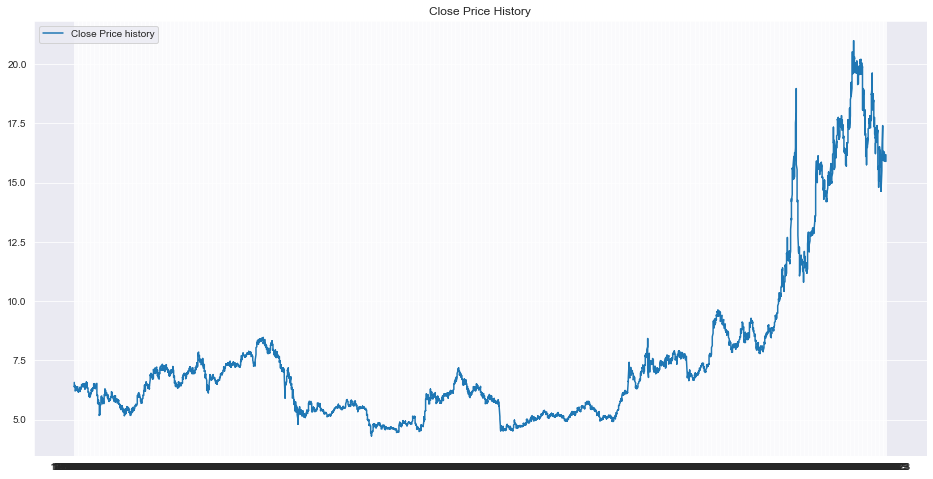

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import *
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from torch.utils.data import Dataset, DataLoader, TensorDataset

akbank_data = pd.read_csv("C:\\Users\\ERALP\\OneDrive\\Desktop\\Software Engineering\\SWE599---Financial-Time-Series-Volatility-and-Return-Forecasting\\Code\\akbank_data.csv")


print(akbank_data.shape)
print(akbank_data.describe())
print(akbank_data.info())


plt.figure(figsize=(16,8))
plt.plot(akbank_data['Date'], akbank_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.legend()
plt.show()


(9992, 6)
              Open         High          Low        Close
count  9992.000000  9992.000000  9992.000000  9992.000000
mean      7.552604     7.586324     7.514919     7.551290
std       3.433072     3.460357     3.401024     3.431051
min       4.310000     4.350000     4.280000     4.310000
25%       5.440000     5.460000     5.420000     5.440000
50%       6.490000     6.520000     6.460000     6.480000
75%       7.780000     7.810000     7.760000     7.780000
max      20.980000    21.400000    20.500000    20.980000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9992 non-null   datetime64[ns]
 1   Hour    9992 non-null   object        
 2   Open    9992 non-null   float64       
 3   High    9992 non-null   float64       
 4   Low     9992 non-null   float64       
 5   Close   9992 non-null   float64       
dtypes: da

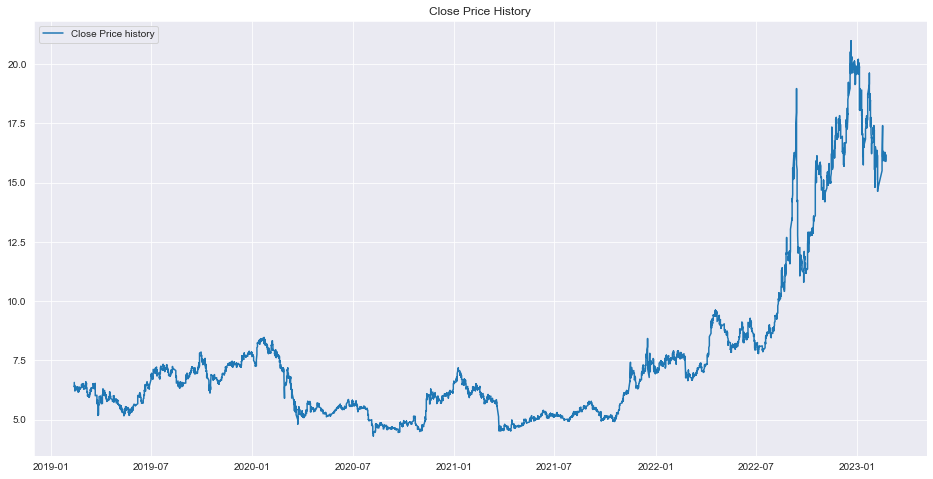

In [2]:
# Convert Date to float

akbank_data['Date'] = pd.to_datetime(akbank_data['Date'], format='%d/%m/%Y')
akbank_data.head()

print(akbank_data.shape)
print(akbank_data.describe())
print(akbank_data.info())


plt.figure(figsize=(16,8))
plt.plot(akbank_data['Date'], akbank_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.legend()
plt.show()

# akbank_data['Datetime'] = pd.to_datetime(akbank_data['Date'] + " " + akbank_data['Hour'])
# akbank_data.set_index('Datetime')
# akbank_data.drop(['Date', 'Hour'], axis=1, inplace=True)
# akbank_data1 = akbank_data[['Datetime','Open','High','Low','Close',]]
# print(akbank_data1.head ())
# plt.plot(akbank_data1['Datetime'], akbank_data1['Close'])

In [3]:
# Engaging the Linear Regression Model

x = akbank_data['Date'].values
X = x.reshape(-1,1)
print(X.shape)
y=akbank_data['Close'].values
y = y.reshape(-1,1)
ss = StandardScaler()
X = ss.fit_transform(X)

(9992, 1)


In [4]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)



In [5]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred[:5]

array([[10.95265393],
       [ 7.98658752],
       [ 9.18656218],
       [ 7.20757171],
       [ 4.83665402]])

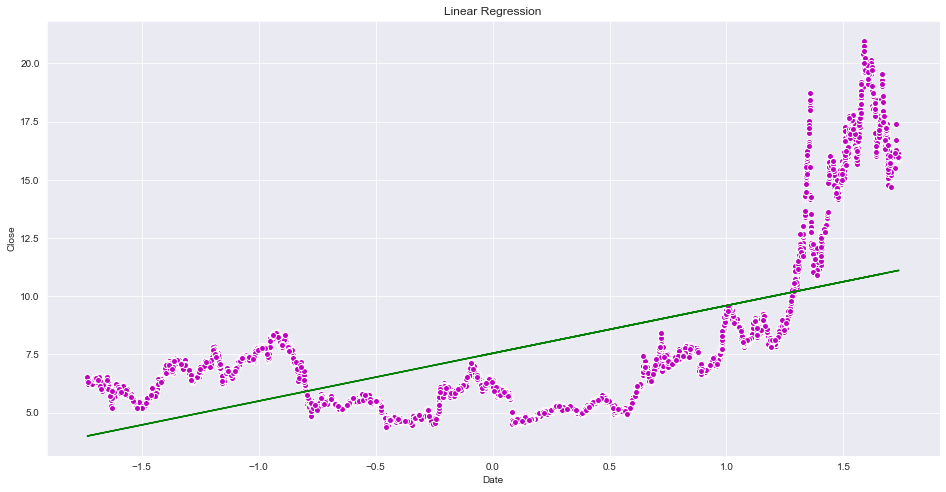

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(X_train,y_train,color='m',edgecolor='w')
plt.plot(X_test,y_pred,color='g')
plt.title("Linear Regression")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [7]:
# Evaluating the Linear Regression Model

LR_r2_score = r2_score(y_test, y_pred)
LR_mean_absolute_error = mean_absolute_error(y_test, y_pred)
LR_mean_squared_error = mean_squared_error(y_test, y_pred)
LR_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-Square Value:", LR_r2_score, "\n")
print("Mean Absolute Error:", LR_mean_absolute_error, "\n")
print("Mean Squared Error:", LR_mean_squared_error, "\n")
print("Root Mean Squared Error:", LR_root_mean_squared_error, "\n")


R-Square Value: 0.36597350689766495 

Mean Absolute Error: 2.262853868343352 

Mean Squared Error: 7.584893781767234 

Root Mean Squared Error: 2.7540685869758645 



In [8]:
# Engaging Decision Tree Regressor Model

ss= StandardScaler()
X_dt= ss.fit_transform(X)
y_dt= ss.fit_transform(y)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=.30)

In [9]:
DT = DecisionTreeRegressor(random_state=0)

DT.fit(X_train_dt, y_train_dt)

y_pred_dt = DT.predict(X_test_dt)
y_pred_dt[:5]

array([-0.19857593, -0.69932221, -0.79718343, -0.65385282, -0.6165446 ])

In [10]:
DT_r2_score = r2_score(y_test_dt, y_pred_dt)
DT_mean_absolute_error = mean_absolute_error(y_test_dt, y_pred_dt)
DT_mean_squared_error = mean_squared_error(y_test_dt, y_pred_dt)
DT_root_mean_squared_error = np.sqrt(mean_squared_error(y_test_dt, y_pred_dt))

print("R-Square Value:", DT_r2_score, "\n")
print("Mean Absolute Error:", DT_mean_absolute_error, "\n")
print("Mean Squared Error:", DT_mean_squared_error, "\n")
print("Root Mean Squared Error:", DT_root_mean_squared_error, "\n")

R-Square Value: 0.9988982170394031 

Mean Absolute Error: 0.01785571688373553 

Mean Squared Error: 0.0010815432573229164 

Root Mean Squared Error: 0.03288682498087823 



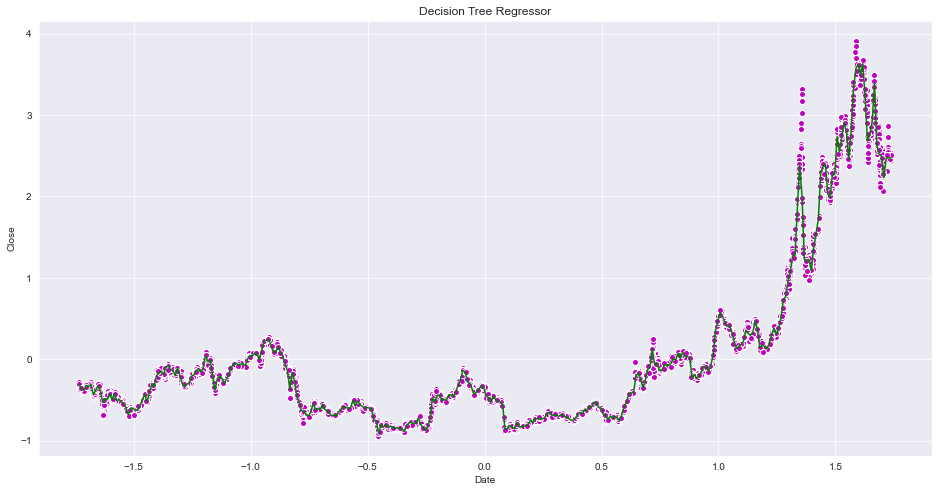

In [11]:
X_val = np.arange(min(X_test_dt), max(X_test_dt), 0.01)
X_val = X_val.reshape((len(X_val), 1))
plt.figure(figsize=(16, 8))
plt.scatter(X_train_dt,y_train_dt,color='m',edgecolor='w')
plt.plot(X_val, DT.predict(X_val), color='g')
plt.title("Decision Tree Regressor")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [12]:
# Engaging Random Forest Regressor Model
y


array([[ 6.57],
       [ 6.52],
       [ 6.57],
       ...,
       [15.89],
       [16.13],
       [16.17]])

In [13]:
ss = StandardScaler()
X_rf = ss.fit_transform(X)
y_rf = ss.fit_transform(y)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=.30)
y_rf

array([[-0.28601708],
       [-0.3005906 ],
       [-0.28601708],
       ...,
       [ 2.43048779],
       [ 2.5004407 ],
       [ 2.51209952]])

In [14]:
RF = RandomForestRegressor(n_estimators=100, random_state=0)

RF.fit(X_train_rf, y_train_rf)
y_pred_rf = RF.predict(X_test_rf)
y_pred_rf[:5]

C:\Users\ERALP\AppData\Local\Temp\ipykernel_15568\123288210.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train_rf, y_train_rf)


array([-0.71337194, -0.8010357 , -0.5717491 ,  0.00307712, -0.10944473])

In [15]:
RF_r2_score = r2_score(y_test_rf, y_pred_rf)
RF_mean_absolute_error = mean_absolute_error(y_test_rf, y_pred_rf)
RF_mean_squared_error = mean_squared_error(y_test_rf, y_pred_rf)
RF_root_mean_squared_error = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

print("R-Square Value:", RF_r2_score, "\n")
print("Mean Absolute Error:", RF_mean_absolute_error, "\n")
print("Mean Squared Error:", RF_mean_squared_error, "\n")
print("Root Mean Squared Error:", RF_root_mean_squared_error, "\n")

R-Square Value: 0.9988601281195352 

Mean Absolute Error: 0.017492558240969746 

Mean Squared Error: 0.001151475971633668 

Root Mean Squared Error: 0.03393340495195948 



Text(0, 0.5, 'Close')

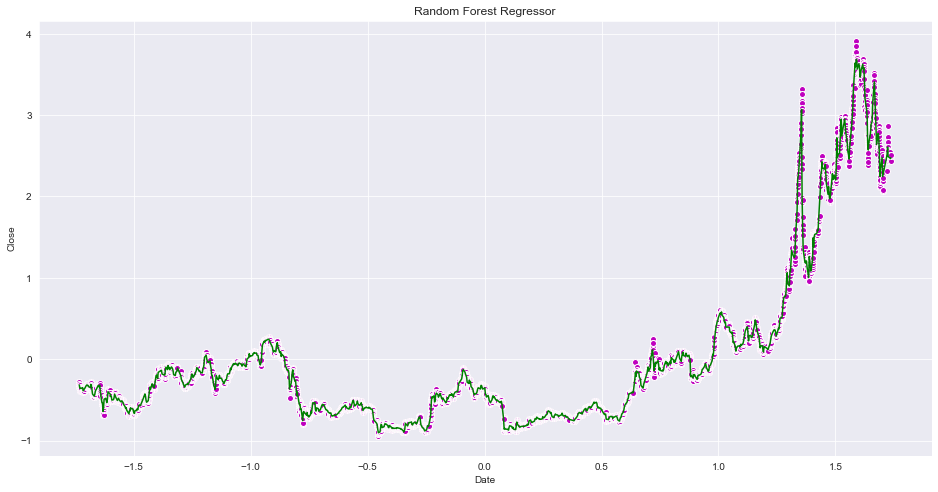

In [16]:
plt.figure(figsize=(16, 8))
plt.scatter(X_rf,y_rf,color='m',edgecolor='w')
plt.plot(X_rf, RF.predict(X_rf), color='g')
plt.title("Random Forest Regressor")
plt.xlabel("Date")
plt.ylabel("Close")

In [17]:
# Comparing the Models

data_plot = {'ModelName': ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor'],
             'R-Square Value': [LR_r2_score, DT_r2_score, RF_r2_score],
             'Mean Absolute Error': [LR_mean_absolute_error, DT_mean_absolute_error, RF_mean_absolute_error],
             'Mean Squared Error': [LR_mean_squared_error, DT_mean_squared_error, RF_mean_squared_error],
             'Root Mean Squared Error': [LR_root_mean_squared_error, DT_root_mean_squared_error, RF_root_mean_squared_error]}

df_plot = pd.DataFrame(data_plot)
df_plot

,ModelName,R-Square Value,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.365974,2.262854,7.584894,2.754069
1,DecisionTreeRegressor,0.998898,0.017856,0.001082,0.032887
2,RandomForestRegressor,0.998860,0.017493,0.001151,0.033933
